In [1]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv(r'D:\Int Project\INTERMEDIATE\Customer-Churn-Prediction-main1\Customer-Churn-Prediction-main\Datasets\telecom_customer_churn.csv')


In [4]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [4]:
# Checking the data types of all the columns
df.dtypes

Customer ID                           object
Gender                                object
Age                                    int64
Married                               object
Number of Dependents                   int64
City                                  object
Zip Code                               int64
Latitude                             float64
Longitude                            float64
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download              float64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming 

Deleting unnesccesary columns


In [5]:
df.drop(columns=['Customer ID','Gender','City','Married','City','Zip Code','Latitude','Longitude'], 
        inplace=True)

Missing value imputation


In [6]:
# Check for null values in each column
null_columns = df.columns[df.isnull().any()]
null_columns


Index(['Offer', 'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Type', 'Avg Monthly GB Download', 'Online Security',
       'Online Backup', 'Device Protection Plan', 'Premium Tech Support',
       'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data',
       'Churn Category', 'Churn Reason'],
      dtype='object')

In [7]:
mean_value = df['Avg Monthly GB Download'].mean()
df['Avg Monthly GB Download'].fillna(mean_value, inplace=True)

Monthly Long distance charges is null means no call have been done which can be charged so changed it to zero

In [8]:
df['Avg Monthly Long Distance Charges'].fillna(value=0, inplace=True)


In [9]:
df['Internet Type'].value_counts()

Internet Type
Fiber Optic    3035
DSL            1652
Cable           830
Name: count, dtype: int64

In [10]:
internet = ['Internet Type']
# Filling null values randomly with 'yes' or 'no'
for column in internet:
    df[column] = df[column].apply(lambda x: np.random.choice(['Fiber Optic', 'DSL','Cable']) if pd.isnull(x) else x)

We are replacing the values with N/A as offer has a values as none but python has a NONE as python object so it shows as null values

Rest two columns are where customer styaed or joined so category for chrun can not be applied to it and we can not drop the values as they are important for model building.

In [11]:
df['Offer'].fillna(value='N/A', inplace=True)
df['Churn Category'].fillna(value='N/A', inplace=True)
df['Churn Reason'].fillna(value='N/A', inplace=True)

In [12]:
# Columns to fill randomly with 'yes' or 'no'
columns_to_fill = ['Multiple Lines','Online Security', 'Online Backup', 'Device Protection Plan','Premium Tech Support', 
                    'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data']
# Filling null values randomly with 'yes' or 'no'
for column in columns_to_fill:
    df[column] = df[column].apply(lambda x: np.random.choice(['Yes', 'No']) if pd.isnull(x) else x)


Encoding

In [13]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['Offer', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Internet Type', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method', 'Customer Status',
       'Churn Category', 'Churn Reason'],
      dtype='object')

In [14]:
# Replace boolean values with '0' and '1' in a specific column
columns_to_replace = ['Phone Service','Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data',
       'Paperless Billing']

In [15]:
df[columns_to_replace] = df[columns_to_replace].replace({'Yes':1, 'No':0,'yes': 1,'no': 0})


In [16]:
from sklearn.preprocessing import LabelEncoder
columns_to_encode = ['Offer', 'Internet Type', 'Contract', 'Payment Method',
       'Customer Status', 'Churn Category', 'Churn Reason']

In [17]:
label_encoder = LabelEncoder()
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])
    print(f"Mapping for {column}: {dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))}")

Mapping for Offer: {'N/A': 0, 'Offer A': 1, 'Offer B': 2, 'Offer C': 3, 'Offer D': 4, 'Offer E': 5}
Mapping for Internet Type: {'Cable': 0, 'DSL': 1, 'Fiber Optic': 2}
Mapping for Contract: {'Month-to-Month': 0, 'One Year': 1, 'Two Year': 2}
Mapping for Payment Method: {'Bank Withdrawal': 0, 'Credit Card': 1, 'Mailed Check': 2}
Mapping for Customer Status: {'Churned': 0, 'Joined': 1, 'Stayed': 2}
Mapping for Churn Category: {'Attitude': 0, 'Competitor': 1, 'Dissatisfaction': 2, 'N/A': 3, 'Other': 4, 'Price': 5}
Mapping for Churn Reason: {'Attitude of service provider': 0, 'Attitude of support person': 1, 'Competitor had better devices': 2, 'Competitor made better offer': 3, 'Competitor offered higher download speeds': 4, 'Competitor offered more data': 5, 'Deceased': 6, "Don't know": 7, 'Extra data charges': 8, 'Lack of affordable download/upload speed': 9, 'Lack of self-service on Website': 10, 'Limited range of services': 11, 'Long distance charges': 12, 'Moved': 13, 'N/A': 14, 'Netw

In [18]:
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt


<Axes: >

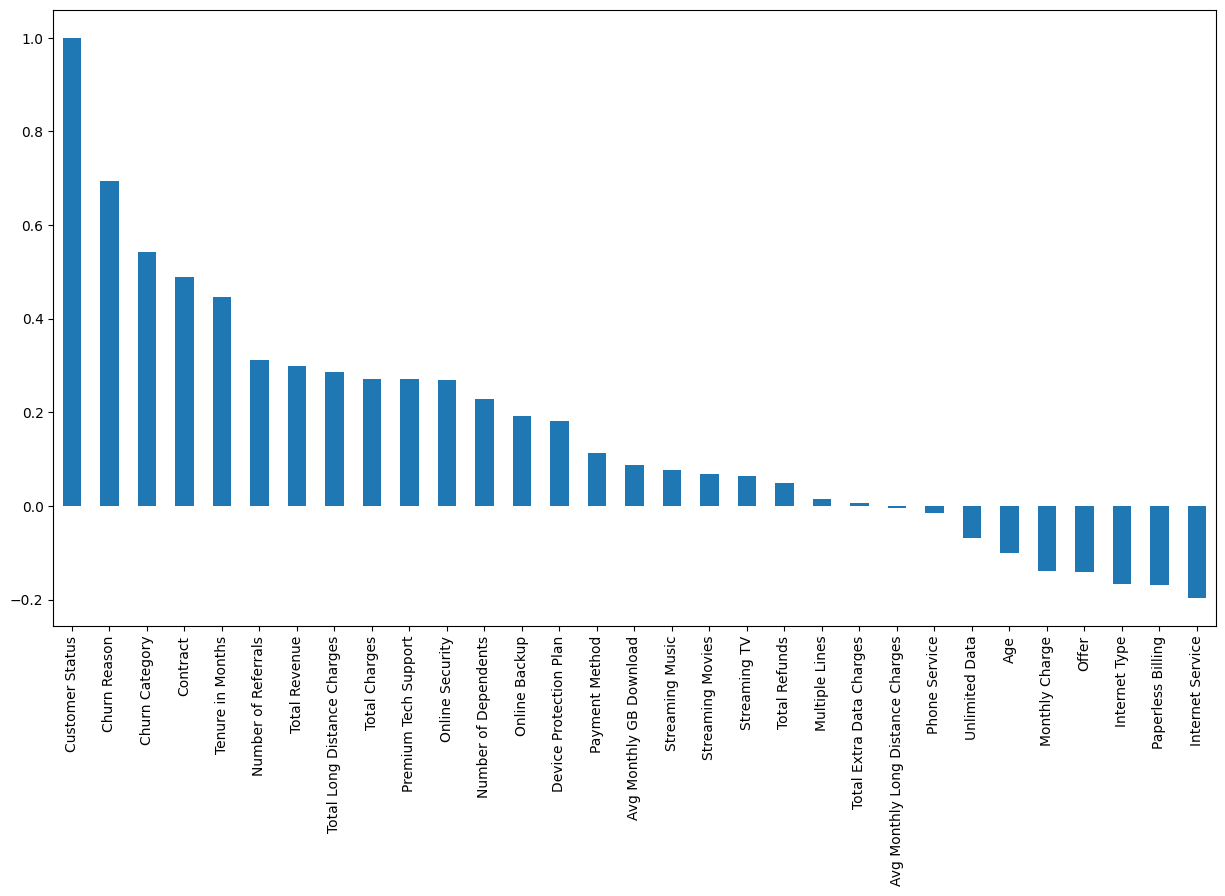

In [20]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df.corr()['Customer Status'].sort_values(ascending = False).plot(kind='bar')

In [20]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Assume your dataset has features (X) and the target variable (y)
X = df.drop('Customer Status', axis=1)  # Features
y = df['Customer Status']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

# Feature scaling (optional, but can be beneficial for certain algorithms)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the RandomForestClassifier (you can choose a different algorithm)
model = RandomForestClassifier(n_estimators=100, random_state=22)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


Accuracy: 1.0
Confusion Matrix:
[[ 550    0    0]
 [   0  136    0]
 [   0    0 1427]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       550
           1       1.00      1.00      1.00       136
           2       1.00      1.00      1.00      1427

    accuracy                           1.00      2113
   macro avg       1.00      1.00      1.00      2113
weighted avg       1.00      1.00      1.00      2113



The Model is overfit

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Standardize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [24]:
# Logistic Regression example (you can replace this with another model)
model = LogisticRegression()

# Apply cross-validation to check for overfitting
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())

c:\Users\visha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\visha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Cross-validation scores: [0.90860692 0.89086069 0.91836735 0.90150843 0.91030195]
Mean CV score: 0.9059290686697106


c:\Users\visha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\visha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [26]:
# Hyperparameter tuning using GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

c:\Users\visha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\visha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]})

In [27]:
# Identify the best hyperparameter
best_param = grid_search.best_params_
print("Best hyperparameter:", best_param)


Best hyperparameter: {'C': 10}


In [28]:
# Train the model with the best hyperparameter
best_model = grid_search.best_estimator_
best_model.fit(X_train_scaled, y_train)

# Evaluate the model on the test set
y_pred = best_model.predict(X_test_scaled)

c:\Users\visha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8992193044712562
Confusion Matrix:
 [[279  22  72]
 [  8  78  11]
 [ 26   3 910]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.75      0.81       373
           1       0.76      0.80      0.78        97
           2       0.92      0.97      0.94       939

    accuracy                           0.90      1409
   macro avg       0.86      0.84      0.85      1409
weighted avg       0.90      0.90      0.90      1409



PCA

In [30]:
# Standardize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


In [31]:
# Calculate covariance matrix and its eigenvalues and eigenvectors
cov_matrix = np.cov(X_train_scaled, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)


In [32]:
# Sort eigenvalues and their corresponding eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

In [33]:
# Plot the explained variance ratio
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

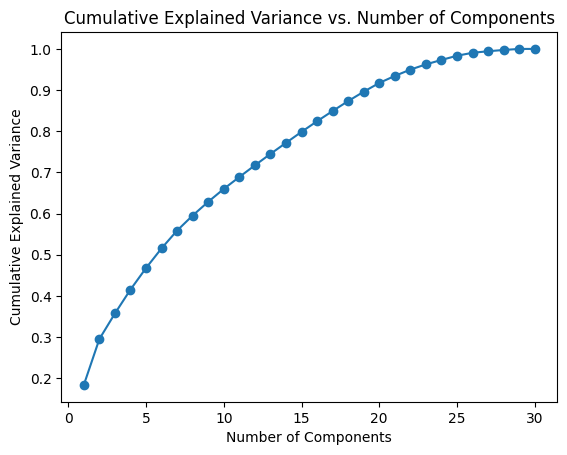

In [36]:
plt.plot(range(1, len(eigenvalues) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.show()

In [52]:
# Choose the number of components based on your decision
n_components = 10 # Adjust this value based on your analysis

In [53]:
# Perform PCA with the chosen number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)

In [54]:
# Build a logistic regression model on the reduced dimensions
model = LogisticRegression()
model.fit(X_train_pca, y_train)

LogisticRegression()

In [55]:
# Apply the same transformation to the test set
X_test_scaled = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaled)

In [56]:
# Evaluate the model on the test set
y_pred = model.predict(X_test_pca)


In [57]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8424414478353442
Confusion Matrix:
 [[262  13  98]
 [ 17  27  53]
 [ 21  20 898]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.70      0.78       373
           1       0.45      0.28      0.34        97
           2       0.86      0.96      0.90       939

    accuracy                           0.84      1409
   macro avg       0.73      0.65      0.68      1409
weighted avg       0.83      0.84      0.83      1409

